# Исследование надежности заемщиков


## Откроем таблицу и изучим общую информацию о данных

**Задание 1**

In [1]:
# импорт библиотеки pandas и чтение файла data.csv
import pandas as pd

try:
    data = pd.read_csv('/Users/marina/CSV_files/data.csv')
except:
    data = pd.read_csv('data.csv')

**Задание 2**

In [2]:
# выводим первые 20 строк датасета
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3**

In [3]:
# выводим основную информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4**

In [4]:
# выводим количество пропущенных значений для каждого столбца
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5**

In [5]:
# заполняем пропуски в столбце total_income медианным значением по каждому типу
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6**

In [6]:
# заменим все отрицательные значения на положительные в столбце days_employed
data['days_employed'] = data['days_employed'].abs()

**Задание 7**

In [7]:
# выведем медианное значение трудового стажа для каждого типа занятости в днях
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть.

**Задание 8**

In [8]:
# выведем перечень уникальных значений столбца children
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9**

In [9]:
# удалим строки, в которых встречаются  аномальные значения в столбце children
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10**

In [10]:
# проверим, удалились ли аномальные значения
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11**

In [11]:
# заполним пропуски в столбце days_employed медианными значениями для каждого типа занятости income_type
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12**

In [12]:
# убедимся, что все пропуски заполнены
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13**

In [13]:
# заменим тип данных в столбце total_income на целочисленный
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14**

In [14]:
# обработаем неявные дубликаты в столбце education, приведем значения к нижнему регистру
data['education'] = data['education'].str.lower()

**Задание 15**

In [15]:
# выведем на экран количество строк-дубликатов
data.duplicated().sum()

71

In [16]:
# удалим строки-дубликаты
data = data.drop_duplicates()

### Категоризация данных

**Задание 16**


In [17]:
# напишем функцию для категоризации данных в столбце total_income
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17**

In [19]:
# выведем на экран перечень уникальных целей взятия кредита
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18**

In [20]:
# напишем функцию для категоризации целей кредита
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
# сформируем сводную таблицу amount_of_child_data_pivot. Это действие позволит прослeдить связь между наличием 
# и количеством детей и тем, была ли задолженность по выплате кредита
amount_of_child_data_pivot = data.pivot_table(index = ['children'], columns = 'debt', values = 'purpose', 
                                              aggfunc = 'count')  

In [23]:
# заполним нулями пропуски в данных, в строке, содержащей информацию о 5 детях
amount_of_child_data_pivot =  amount_of_child_data_pivot.fillna(0)

In [24]:
# приводим данные в подстолбцах 0 и 1 столбца debt  к целым значениям для удобства восприятия информации
amount_of_child_data_pivot[0] = amount_of_child_data_pivot[0].astype('int')
amount_of_child_data_pivot[1] = amount_of_child_data_pivot[1].astype('int')

In [25]:
# Добавим в сводную таблицу amount_of_child_data_pivot новый столбец percent, в котором посчитаем долю процента
# задержки в выплате кредита в каждой категории(по количеству детей)
amount_of_child_data_pivot['percent'] = (amount_of_child_data_pivot[1] / 
                                        (amount_of_child_data_pivot[1] + amount_of_child_data_pivot[0])) * 100

In [26]:
# округляем значения в стобце percent до одной цифры после запятой
pd.set_option('display.float_format', '{:.1f}'.format)
amount_of_child_data_pivot

debt,0,1,percent
children,,,
0,13028,1063,7.5
1,4364,444,9.2
2,1858,194,9.5
3,303,27,8.2
4,37,4,9.8
5,9,0,0.0


In [27]:
# с помощью DataFrame строим финальный вариант таблицы со стобцами children и percent
final_amount_of_child = pd.DataFrame({'children': [0, 1, 2, 3, 4, 5],
 'percent': [7.5, 9.2, 9.5, 8.2, 9.8, 0.0],
})
# сортируем данные в столбце percent по возрастанию
final_amount_of_child = final_amount_of_child.sort_values (by = ['percent'], ascending = True)
final_amount_of_child

,children,percent
5,5,0.0
0,0,7.5
3,3,8.2
1,1,9.2
2,2,9.5
4,4,9.8


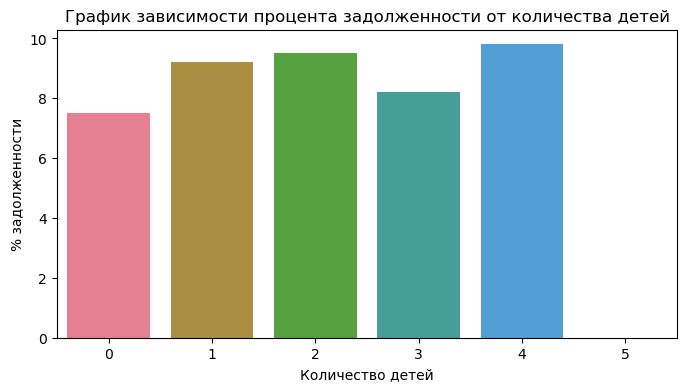

In [28]:
# подключаем библиотеку seaborn для визуализации полученных данных
import seaborn as sns
# подключаем библиотеку matplotlib.
import matplotlib.pyplot as plt
# задаем размер графика
plt.rcParams['figure.figsize'] = [8,4] 
# визуализируем данные с помощью столбчатой диаграммы
sns.barplot(data = final_amount_of_child.sort_values(by='percent'), x = 'children', y = 'percent', 
           palette = 'husl').set(title = 'График зависимости процента задолженности от количества детей')
plt.xlabel('Количество детей')
plt.ylabel('% задолженности');

**Вывод:**
    Анализ  финальной таблицы и графика позволяет  сделать вывод о том, что существует очевидная зависимость роста количества задержек  в выплатах кредита от количества детей. 
    Люди, которые не имеют детей, являются наиболее надежными плательщиками, доля должников среди них составляет всего 7,5%.
    Доля должников в семьях с 1м или 2мя детьми на 1,7-2% выше, чем в семьях без детей, и составляет 9,2% и 9,5% соответственно.
    Можно сделать вывод, что чем больше в семье детей, тем  выше вероятность того, что будет задержка в выплате кредита.
    Категории с 3мя, 4мя, 5ью детьми сравнивать с остальными некорректно из-за очень маленькой выборки.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [29]:
# сформируем сводную таблицу marriage_data_pivot. Это действие позволит проследить связь между семейным 
# положением и тем, была ли задолженность по выплате кредита
marriage_data_pivot = data.pivot_table(index = ['family_status'], columns = 'debt', values = 'purpose_category', 
                                       aggfunc = 'count')

In [30]:
# добавим в сводную таблицу marriage_data_pivot новый столбец percent, в котором посчитаем долю процента 
# задержки в выплате кредита в каждой категории(по семейному положению)
marriage_data_pivot['percent'] = (marriage_data_pivot[1] / (marriage_data_pivot[1] + marriage_data_pivot[0])) * 100
marriage_data_pivot

debt,0,1,percent
family_status,,,
Не женат / не замужем,2523,273,9.8
в разводе,1105,84,7.1
вдовец / вдова,888,63,6.6
гражданский брак,3749,385,9.3
женат / замужем,11334,927,7.6


In [31]:
# c помощью DataFrame строим финальный вариант таблицы со стобцами family_status и percent
final_marriage = pd.DataFrame({'family_status': ['вдова/вдовец', 'в разводе', 'женат/замужем', 
'гражданский брак', 'не женат/не замужем'], 'percent': [6.6, 7.1, 7.6, 9.3, 9.8],})
# cортируем данные в столбце percent по возрастанию
final_marriage = final_marriage.sort_values (by = ['percent'], ascending = True)
final_marriage

,family_status,percent
0,вдова/вдовец,6.6
1,в разводе,7.1
2,женат/замужем,7.6
3,гражданский брак,9.3
4,не женат/не замужем,9.8


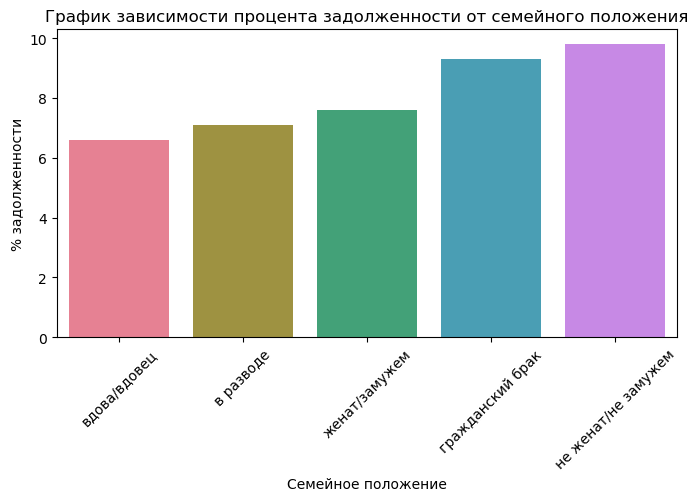

In [32]:
# визуализируем данные с помощью столбчатой диаграммы
sns.barplot(data = final_marriage.sort_values(by='percent'), x = 'family_status', y = 'percent', 
           palette = 'husl').set(title = 'График зависимости процента задолженности от семейного положения')
plt.xlabel('Семейное положение')
plt.ylabel('% задолженности')
plt.xticks(rotation=45);

**Вывод:** 
    Проанализируем полученные данные.
    Вдовцы и люди в разводе реже всего задерживают выплаты, их доля составляет 6,6% и 7,1% соответственно. Но по этим двум категориям выборка слишком мала, поэтому некорректно брать ее в расчет. 
    Неженатые люди и люди, состоящие в гражданском браке склонны к задерживанию кредитных выплат более других категорий. Их доля составляет 9.3% и 9.8%.
    Люди, состоящие в браке, не выплачивают кредит вовремя в среднем на 2% реже, чем неженатые и состоящие в гражданском браке, их доля составляет 7,6%.
    Стоит также отметить, что выборка по последним двум категориям примерно в 3 раза меньше, чем у женатых людей.
    Исходя из этого можно проследить определенную связь между семейным положением и несвоевременными выплатами кредита, и сделать выводы о том, что семейные люди и люди, состоявшие ранее в браке, являются более надёжными заёмщиками, но из-за  несбалансированности выборки почти по всем категориям, категорично утверждать этого мы не можем. 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [33]:
# сформируем сводную таблицу total_income_data_pivot. Это действие позволит проследить связь между уровнем 
# дохода и тем, была ли задолженность по выплате кредита
total_income_data_pivot = data.pivot_table(index = ['total_income_category'], columns = 'debt', values = 'purpose_category', 
                                           aggfunc = 'count')

In [34]:
# добавим в сводную таблицу total_income_data_pivot новый столбец percent, в котором посчитаем долю процента задержки в выплате
##кредита в каждой категории(уровень дохода)
total_income_data_pivot['percent'] = (total_income_data_pivot[1]
                                      / (total_income_data_pivot[1] + total_income_data_pivot[0])) * 100
total_income_data_pivot

debt,0,1,percent
total_income_category,,,
A,23,2,8.0
B,4660,354,7.1
C,14568,1353,8.5
D,328,21,6.0
E,20,2,9.1


In [35]:
# с помощью DataFrame строим финальный вариант таблицы со стобцами total_income_category и percent
final_total_income = pd.DataFrame({'total_income_category': ['A', 'B', 'C', 'D', 'E'],
 'percent': [8.0, 7.1, 8.5, 6.0, 9.1],
})
# сортируем данные в столбце total_income_category по алфавиту
final_total_income = final_total_income.sort_values (by = ['total_income_category'], ascending = True)
final_total_income

,total_income_category,percent
0,A,8.0
1,B,7.1
2,C,8.5
3,D,6.0
4,E,9.1


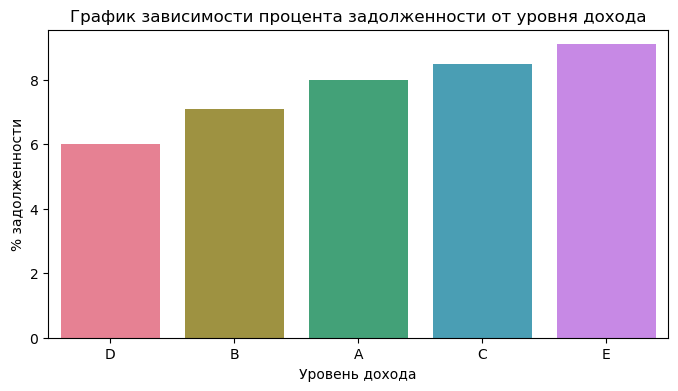

In [36]:
# визуализируем данные с помощью столбчатой диаграммы
sns.barplot(data = final_total_income.sort_values(by='percent'), x = 'total_income_category', y = 'percent', 
           palette = 'husl').set(title = 'График зависимости процента задолженности от уровня дохода')
plt.xlabel('Уровень дохода')
plt.ylabel('% задолженности');

**Вывод:** 
    Для начала проанализируем сбалансированность выборки. По категориям A и E она настолько мала, что мы не можем брать ее в расчет при анализе. Для категории D она немного больше, но тем не менее недостаточна для анализа по сравнению с двумя оставшимися категориями.
    Поэтому анализируем данные всего по двум категориям B и С.
    Люди с доходом от 50 001 до 200 000 рублей (категория С) не платят кредитные взносы вовремя в 8,5% случаев.
    Люди с доходом от 200 001 до 1 000 000 рублей (категория B) задерживают платежи в 7,1% случаев.
    Таким образом, прослеживается определенная зависисмость между уровнем дохода и своевременной платежеспособностью. Чем выше доход, тем задержки в платежах случаются реже.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [37]:
# сформируем сводную таблицу purpose_category_data_pivot. Это действие позволит проследить связь между целью
# кредита и тем, была ли задолженность по выплате кредита
purpose_category_data_pivot = data.pivot_table(index = ['purpose_category'], columns = 'debt', 
values = 'gender', aggfunc = 'count')

In [38]:
# добавим в сводную таблицу purpose_category_data_pivot новый столбец percent, в котором посчитаем долю 
# процента задержки в выплате кредита в каждой категории(в зависимости от цели кредита)
purpose_category_data_pivot['percent'] = (purpose_category_data_pivot[1]
                                      / (purpose_category_data_pivot[1] + purpose_category_data_pivot[0])) * 100
purpose_category_data_pivot

debt,0,1,percent
purpose_category,,,
операции с автомобилем,3879,400,9.3
операции с недвижимостью,9971,780,7.3
получение образования,3619,369,9.3
проведение свадьбы,2130,183,7.9


In [39]:
# c помощью DataFrame строим финальный вариант таблицы со стобцами purpose_category и percent
final_purpose = pd.DataFrame({'purpose_category': ['операции с недвижимостью', 'проведение свадьбы', 
'получение образования', 'операции с автомобилем'], 'percent': [7.3, 7.9, 9.3, 9.3],})
# cортируем данные в столбце percent по возрастанию
final_purpose = final_purpose.sort_values (by = ['percent'], ascending = True)
final_purpose

,purpose_category,percent
0,операции с недвижимостью,7.3
1,проведение свадьбы,7.9
2,получение образования,9.3
3,операции с автомобилем,9.3


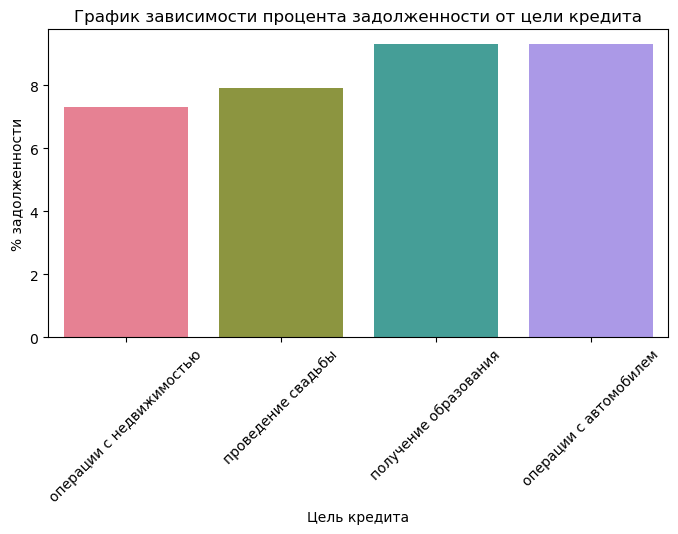

In [40]:
# визуализируем данные с помощью столбчатой диаграммы
sns.barplot(data = final_purpose.sort_values(by='percent'), x = 'purpose_category', y = 'percent', 
           palette = 'husl').set(title = 'График зависимости процента задолженности от цели кредита')
plt.xlabel('Цель кредита')
plt.ylabel('% задолженности')
plt.xticks(rotation=45);

**Вывод:** 
    Анализ таблицы и линейного графика позволяет сделать вывод что люди, берущие кредиты для операции с недвижимостью и на проведение свадьбы существенно реже (в среднем на 1,7%), чем остальные категории,  опаздывают с кредитными платежами, их доля составляет 7,3% и 7,9% соответственно.
    Своевременная оплата кредитов на образование и операции с автомобилем происходит реже (9,3% людей оплачивают кредитные взносы с задержкой).
    Можно предположить, что на проведение свадьбы, образование и операции с автомобилями люди берут потребительские кредиты, сумма которых не очень большая. В случае задержки платежа банковские пенни будут невелики.
    На операции с недвижимостью люди, как правило, берут ипотеку на большие суммы,  с высокими ежемесячными выплатами, в случае не погашения выплаты в срок, задолженность будет сильно увеличиваться, поэтому эта категория заёмщиков более ответственно подходит к вопросу своевременности в оплате кредита. 

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

**Ответ:**
    Причинами  появления пропусков могут служить множество факторов, такие как отсутствие возможности получения или обработки данных, искажение или утаивание нужной для работы информации, человеческий фактор, ошибки ввода данных, выход из строя технического оборудования, данные могут быть неизвестны и т.д.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

**Ответ:** 
    Заполнение пропусков медианным значением для количественных переменных  является одним из самых простых способов восстановления данных. Суть метода заключается в том, чтобы заполнить пропущенные данные медианным значением, высчитанным из доступной выборки. 
    Данный метод прост в реализации. Метод дает более правдоподобную картину, чем просто удаление данных с пропусками, что может привести к безвозвратной потере важных для анализа данных, и в дальнейшем приведет к неточным выводам и искажению результатов.
    Медианный же метод повышает точность и максимально приближает пропущенные данные к истинным, на него не влияют внешние факторы.

### Шаг 4: Общий вывод.

**Анализ предоставленных данных повзоляет сделат следующие выводы:**
1. Процент должников прямо зависит от количества детей. Чем детей больше, тем чаще кредиты не выплачиваются в срок, вероятность этого возрастает на 2% у семей с 2мя детьми в отличие от бездетных.   
2. Зависимость между семейным положением и возвратом кредита в срок также имеет место быть, хотя она не слишком очевидна из-за несбалансированности выборки. Люди, состоящие в официальном браке, в среднем на 2% реже имеют задолженности по платежам, чем неженатые или состоящие в гражданском браке, эти две категории можно объединить в одну, в принципе.
3. Между уровнем дохода и возвратом кредита также есть  зависимость. Проанализировав две категории людей, выборка по которым была достаточной, делаем вывод, что чем выше уровень дохода, тем ниже (на 1,4%) вероятность задержки в сроках погашения кредита.
4. Связь между целью кредита и оплатой кредитных взносов в срок хорошо прослеживается. Кредиты на операции с недвижимостью с большей долей вероятности (на 2%) будут оплачены вовремя, чем кредиты на образование. Возможно, это связано с суммой кредита, процентной ставкой по кредиту и категорией кредита, потребительский он или ипотечный. Заёмщики с ипотечными кредитами  более добросовестно их выплачивают.